In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
obs = pd.read_csv("Bladder_obs.csv", index_col=0, header=0)
print(obs.shape)
obs.head(5)

(67988, 40)


/home/ing/miniconda3/envs/scrna/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,batch,batch_num,orig_ident,nCount_RNA,nFeature_RNA,percent_mito,nCount_HASH,nFeature_HASH,sampleID,HASH_maxID,...,SubType_v1,BroadCellType,KRT_group,KRT_group_subtype,SubType_v2,BroadCellType_v2,SubType_v3,SubType_C,SubType_v4,CDH_pct_epithelial
B1__AAACCCAAGAGTAACT,B1,1,BladderNuclei,3428,2622,0.032672,48,6,B1,Hash5-ATGATGAACAGCCAG,...,CDH12_CDH18_Epithelial,Epithelial,No_KRT,No_KRT_CDH12_CDH18_Epithelial,CDH12_CDH18_Epithelial,Epithelial,CDH12_CDH18_Epithelial,CDH12_CDH18_Epithelial,CDH12_CDH18_Epithelial,0.560077
B1__AAACCCAAGAGTCAAT,B1,1,BladderNuclei,3401,2559,0.032931,55,6,B1,Hash3-GGTAGATGTCCTCAG,...,CDH12_CDH18_Epithelial,Epithelial,No_KRT,No_KRT_CDH12_CDH18_Epithelial,ACTA2_Fibroblast,Fibroblast,ACTA2_Fibroblast,Fibroblast,ACTA2_Fibroblast,0.727425
B1__AAACCCAAGCGGACAT,B1,1,BladderNuclei,3955,2845,0.057649,51,6,B1,Hash5-ATGATGAACAGCCAG,...,CDH12_CDH18_Epithelial,Epithelial,No_KRT,No_KRT_CDH12_CDH18_Epithelial,CDH12_CDH18_Epithelial,Epithelial,CDH12_CDH18_Epithelial,CDH12_CDH18_Epithelial,CDH12_CDH18_Epithelial,0.560077
B1__AAACCCAAGGGACTGT,B1,1,BladderNuclei,3535,2469,0.018388,48,6,B1,Hash5-ATGATGAACAGCCAG,...,FLT1_Endothelial,Endothelial,No_KRT,No_KRT_FLT1_Endothelial,FLT1_Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,0.560077
B1__AAACCCAAGTGCCGAA,B1,1,BladderNuclei,9467,4782,0.008345,56,6,B1,Hash4-TGGTGTCATTCTTGA,...,KRT13_Epithelial,Epithelial,No_KRT,No_KRT_KRT13_Epithelial,KRT13_Epithelial,Epithelial,KRT_Epithelial,KRT_Epithelial,KRT_Epithelial,0.560077


In [4]:
patients = np.unique(obs.Patient)
patients

array(['Bladder1126', 'Bladder1204', 'Bladder1246', 'Bladder36',
       'Bladder371', 'Bladder419', 'Bladder446', 'Bladder485',
       'Bladder489', 'Bladder518', 'Bladder54', 'Bladder59', 'Bladder590',
       'Bladder593', 'Bladder674', 'Bladder702', 'Bladder72',
       'Bladder739', 'Bladder752', 'Bladder763', 'Bladder8', 'Bladder824',
       'Bladder896', 'Bladder912', 'Bladder913'], dtype=object)

In [6]:
master_palette = {
    "ACTA2_Fibroblast": "#ffbb78", 
    "APC_Macrophage": "#7f7f7f", 
    "Activated_Bcell": "#c5b0d5", 
    "CDH12_CDH18_Epithelial": "#1f77b4", 
    "DSG3_Epithelial": "#ff7f0e", 
    "Dendritic_cell": "#c49c94", 
    "Endothelial": "#17becf", 
    "FAP_Fibroblast": "#8c564b", 
    "Inflam_Macrophage": "#aec7e8", 
    "Intermediate_Epithelial": "#2ca02c", 
    "KRT_Epithelial": "#9467bd", 
    "Late_Activation_CD8T": "#e377c2", 
    "Naive_Tcell": "#ff9896", 
    "PDGFRB_Fibroblast": "#f7b6d2", 
    "PDPN_Fibroblast": "#98df8a", 
    "Plasma_Bcell": "#c7c7c7", 
    "Proliferating_Epithelial": "#d62728", 
    "Treg": "#dbdb8d", 
    "KRT_13_17_Epithelial": "#bcbd22", 
}

Index(['Epithelial', 'Lymphocyte', 'Myeloid', 'Endothelial', 'Fibroblast'], dtype='object') [105   6   4   1   1]


In [45]:
np.random.choice(20, len(np.unique(obs.BroadCellType_v2))).shape

(5,)

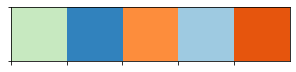

In [67]:
all_labels = np.unique(obs.BroadCellType_v2)
pal = np.array(sns.color_palette('tab20c', 20))
pal = pal[np.random.choice(20, len(all_labels), replace=False)]
sns.palplot(pal)
pal = {k: c for k, c in zip(all_labels, pal)}

In [75]:
'x' in vals.index

False

Bladder1126 [105, 6, 4, 1, 1] [0.8974359  0.05128205 0.03418803 0.00854701 0.00854701]
Bladder1204 [193, 47, 30, 18, 15] [0.6369637  0.15511551 0.0990099  0.05940594 0.04950495]
Bladder1246 [2968, 78, 57, 55, 54] [0.92403487 0.02428394 0.01774595 0.01712329 0.01681196]
Bladder36 [1947, 74, 59, 52, 47] [0.89352914 0.03396053 0.02707664 0.02386416 0.02156953]
Bladder371 [415, 75, 9, 7, 5] [0.81213307 0.14677104 0.01761252 0.01369863 0.00978474]
Bladder419 [735, 44, 20, 14, 2] [0.90184049 0.05398773 0.02453988 0.01717791 0.00245399]
Bladder446 [883, 38, 31, 30, 13] [0.88743719 0.03819095 0.03115578 0.03015075 0.01306533]
Bladder485 [1486, 54, 33, 29, 19] [0.91671808 0.03331277 0.0203578  0.01789019 0.01172116]
Bladder489 [2742, 177, 35, 34, 33] [0.90764647 0.05858987 0.01158557 0.01125455 0.01092354]
Bladder518 [1747, 81, 35, 22, 19] [0.91754202 0.04254202 0.01838235 0.01155462 0.00997899]
Bladder54 [8926, 136, 114, 112, 60] [0.95485665 0.01454857 0.01219512 0.01198117 0.00641849]
Bladder

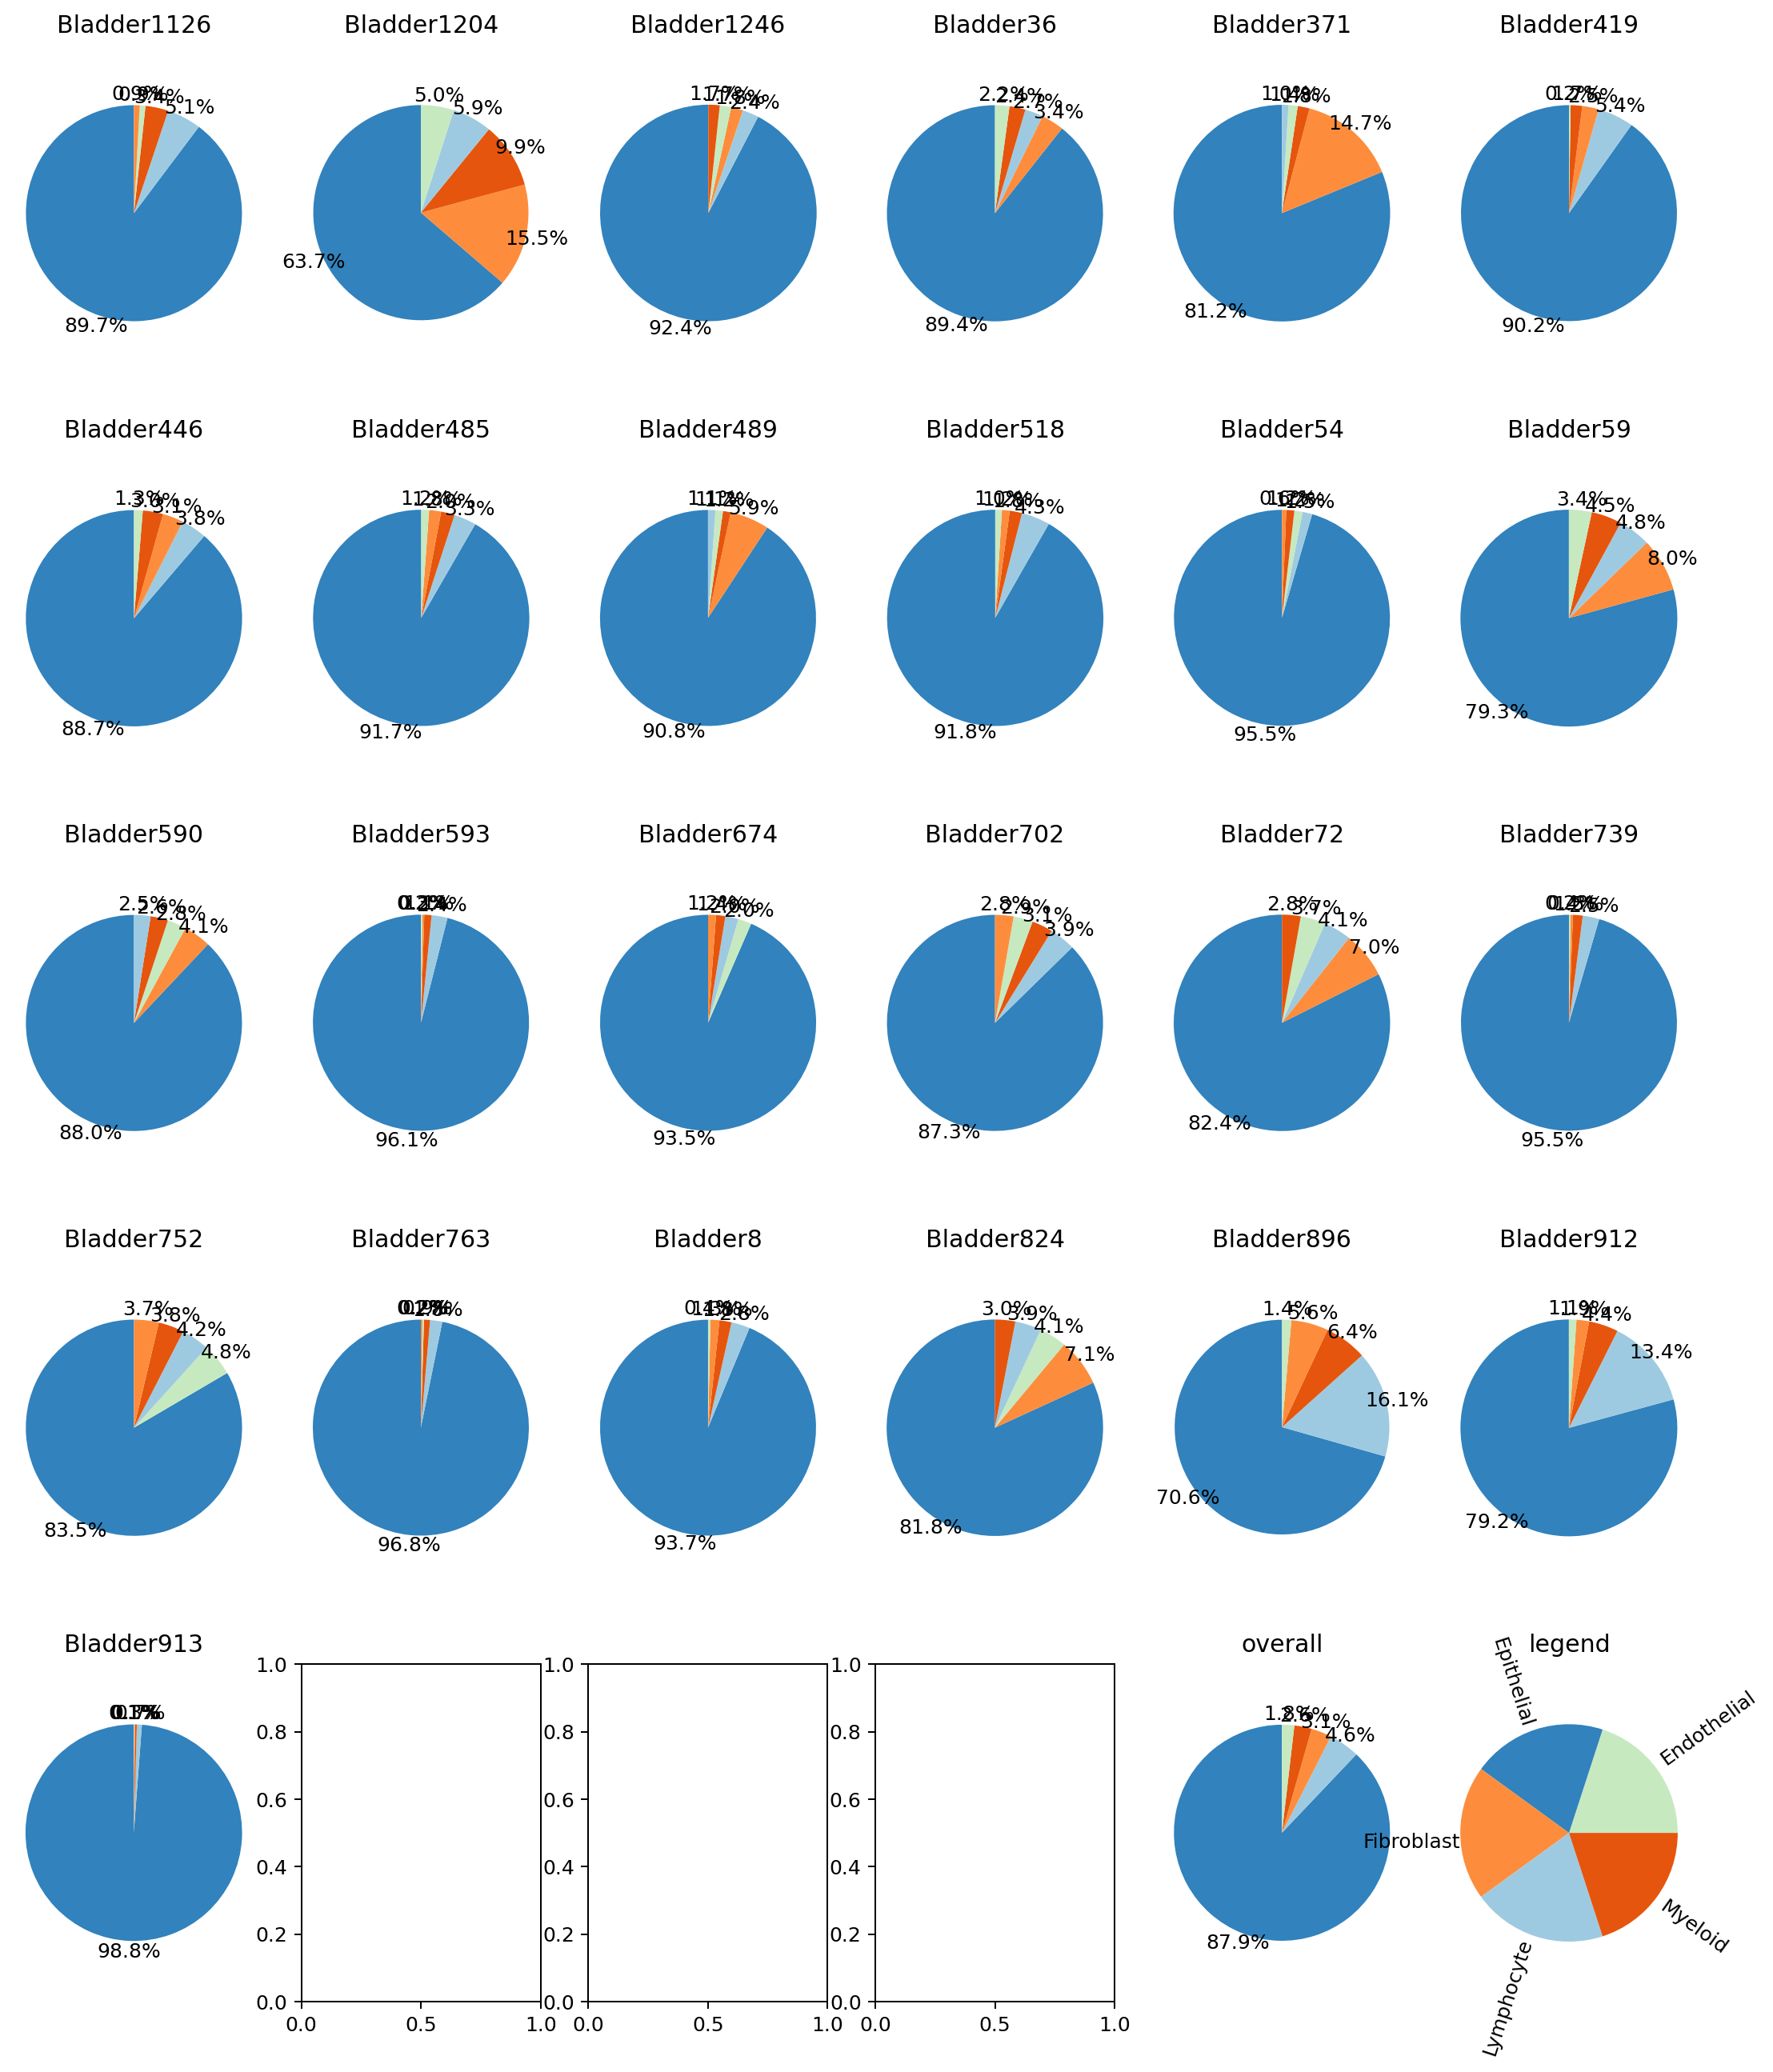

In [88]:
all_labels = np.unique(obs.BroadCellType_v2)
all_types = {c: [] for c in all_labels}

ncol = 5
nrow = int(np.ceil((len(patients)+1) / ncol))

fig, axs = plt.subplots(ncol, nrow, figsize=(3*ncol, 3*nrow), dpi=180, 
#                         gridspec_kw=dict(hspace=1, wspace=1)
                       )

for pt, ax in zip(patients, axs.ravel()):
    vals = obs.query("Patient == @pt").BroadCellType_v2.value_counts()
    sizes, labels = [], []
    for i in range(len(vals)):
        sizes.append(vals.values[i])
        labels.append(vals.index[i])
    print(pt, sizes, sizes/sum(sizes))
    
    for c in all_labels:
        if c in vals.index:
            all_types[c].append(vals[c]/np.sum(vals))
        else:
            all_types[c].append(0)

    colors = [pal[c] for c in labels]
    
    ax.pie(sizes, autopct='%1.1f%%',
           pctdistance=1.1, labeldistance=1.3,
           #labels=labels, 
           shadow=False, startangle=90, rotatelabels=True, 
           colors = colors
          )
    ax.axis('equal')
    ax.set_title(pt)

vals = obs.BroadCellType_v2.value_counts()
sizes, labels = [], []
for i in range(len(vals)):
    sizes.append(vals.values[i])
    labels.append(vals.index[i])
print(pt, sizes, sizes/sum(sizes))
colors = [pal[c] for c in labels]

axs[-1, -2].pie(sizes, autopct='%1.1f%%',
       pctdistance=1.1, labeldistance=1.3,
       shadow=False, startangle=90, rotatelabels=True, 
       colors = colors )
axs[-1, -2].set_title('overall')
axs[-1, -2].axis('equal')

colors = [pal[c] for c in all_labels]
_ = axs[-1, -1].pie([1]*len(all_labels), labels=all_labels, colors=colors, rotatelabels=True, labeldistance=1)
axs[-1, -1].set_title('legend')
axs[-1, -1].axis('equal')

# for ax in axs.ravel():
#     ax.axes(visible=False)

plt.savefig('00_sandbox/patient_pie_charts.svg', bbox_inches='tight')

In [103]:
df = pd.DataFrame(all_types)
df['patient'] = np.unique(obs.Patient)
df = df.melt(id_vars='patient', value_name='Cell %')
df

,patient,variable,Cell %
0,Bladder1126,Endothelial,0.008547
1,Bladder1204,Endothelial,0.049505
2,Bladder1246,Endothelial,0.017123
3,Bladder36,Endothelial,0.021570
4,Bladder371,Endothelial,0.013699
...,...,...,...
120,Bladder8,Myeloid,0.018072
121,Bladder824,Myeloid,0.030358
122,Bladder896,Myeloid,0.063955
123,Bladder912,Myeloid,0.043887


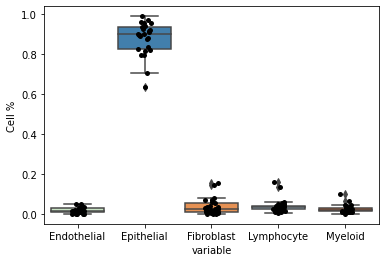

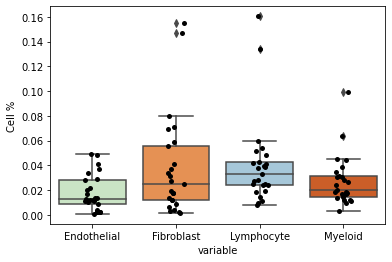

In [105]:
plt.figure()
sns.boxplot(x = 'variable', y = 'Cell %', data = df, palette=pal)
sns.stripplot(x = 'variable', y = 'Cell %', data = df, palette=pal, fc='k')
plt.savefig('00_sandbox/patient_subtype_boxplot.svg', bbox_inches='tight')

plt.figure()
sns.boxplot(x = 'variable', y = 'Cell %', data = df.query("variable != 'Epithelial'"), palette=pal)
sns.stripplot(x = 'variable', y = 'Cell %', data = df.query("variable != 'Epithelial'"), palette=pal, fc='k')
plt.savefig('00_sandbox/patient_subtype_boxplot_nonEpithelial.svg', bbox_inches='tight')